In [ ]:
import sys
sys.path.append('../')

from einops import rearrange
from datasets.text_video import Dataset
from datasets.action_video import Dataset

In [8]:
from diffusers.models import AutoencoderKL


In [15]:
import torch
vae = AutoencoderKL.from_pretrained(f"stabilityai/sd-vae-ft-ema")

In [10]:
our_dataset = Dataset(
    "/mnt/store/kmei1/projects/t1/datasets/godmodeanimation_runjump/runjump_dataset", 
    256,
    video_length=16,
    dataset_name="UCF-101",
    subset_split="train",
    clip_step=1,
    temporal_transform="rand_clips",
)

In [11]:
iter_dataset = iter(our_dataset)
batch = next(iter_dataset)
batch = next(iter_dataset)
batch = next(iter_dataset)
batch = next(iter_dataset)

In [12]:
batch[0].shape, batch[2].shape

(torch.Size([3, 16, 320, 512]), (4, 16, 40, 64))

In [18]:
batch[0][None, :, 1].shape

torch.Size([1, 3, 320, 512])

In [33]:
import matplotlib.pyplot as plt

In [41]:
batch[0].min()

tensor(-0.9294)

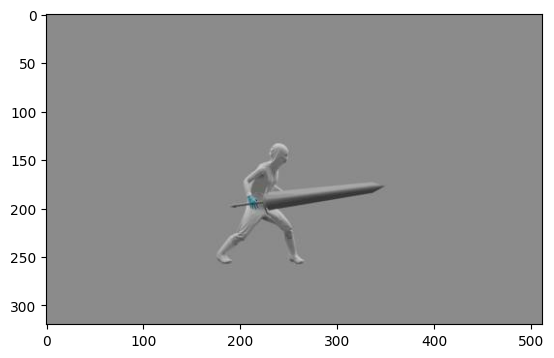

In [42]:
plt.imshow(batch[0][:,1].numpy().transpose((1,2,0)) / 2.0 + 0.5)

In [29]:
l = vae.encode((batch[0][None, :, 1] - 255/2) / (255/2) ).latent_dist.sample()

In [32]:
l.mean()

tensor(-1.6170, grad_fn=<MeanBackward0>)